# Import Packages

In [1]:
import os
import sys

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data.data_preprocessing import handle_missing_values, convert_data_types, handle_outliers
from utils.data import load_data
from utils.helpers import check_and_print_missing_value_counts
from utils.plot import DataVisualizer

# Load the dataset

In [2]:
data = load_data('../data/raw/train.csv')

# Initial Exploration
## Shape and Structure

In [3]:
print(data.shape)
data.head()

(140700, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [4]:
data.drop(columns=['id', 'Name'], inplace=True)

## Data Types

In [5]:
data.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

## Data Type Conversion

In [6]:
data = convert_data_types(data)

# Univariate Analysis

In [7]:
visualizer = DataVisualizer(data)

## Gender
### Checking missing values

In [8]:
check_and_print_missing_value_counts(data, 'Gender')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [9]:
data['Gender'].describe()

count     140700
unique         2
top         Male
freq       77464
Name: Gender, dtype: object

### Visualization

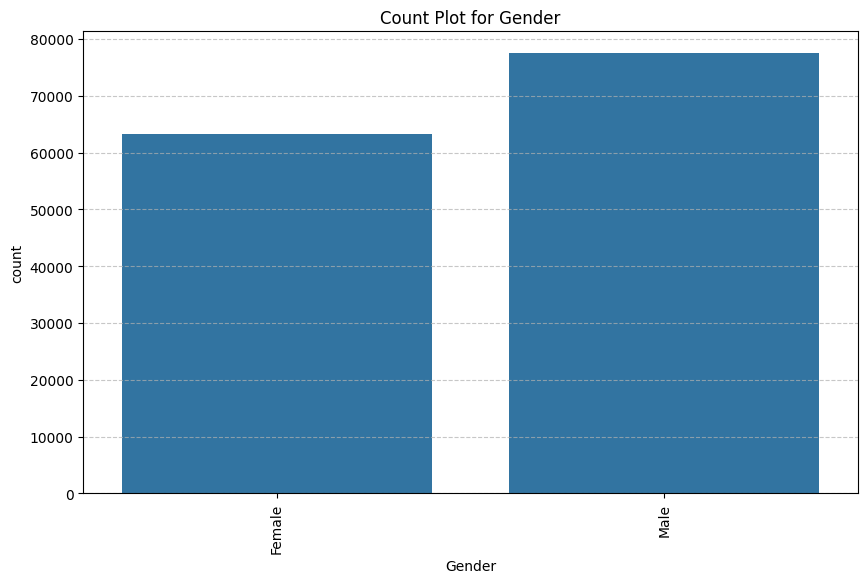

In [10]:
visualizer.plot('Gender')

#### Insights:
- The dataset has more males than females
- This imbalance should be accounted for when performing gender-based analysis to avoid biased results

## Age
### Checking missing values

In [11]:
check_and_print_missing_value_counts(data, 'Age')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [12]:
data['Age'].describe()

count    140700.000000
mean         40.388621
std          12.384099
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

### Visualization

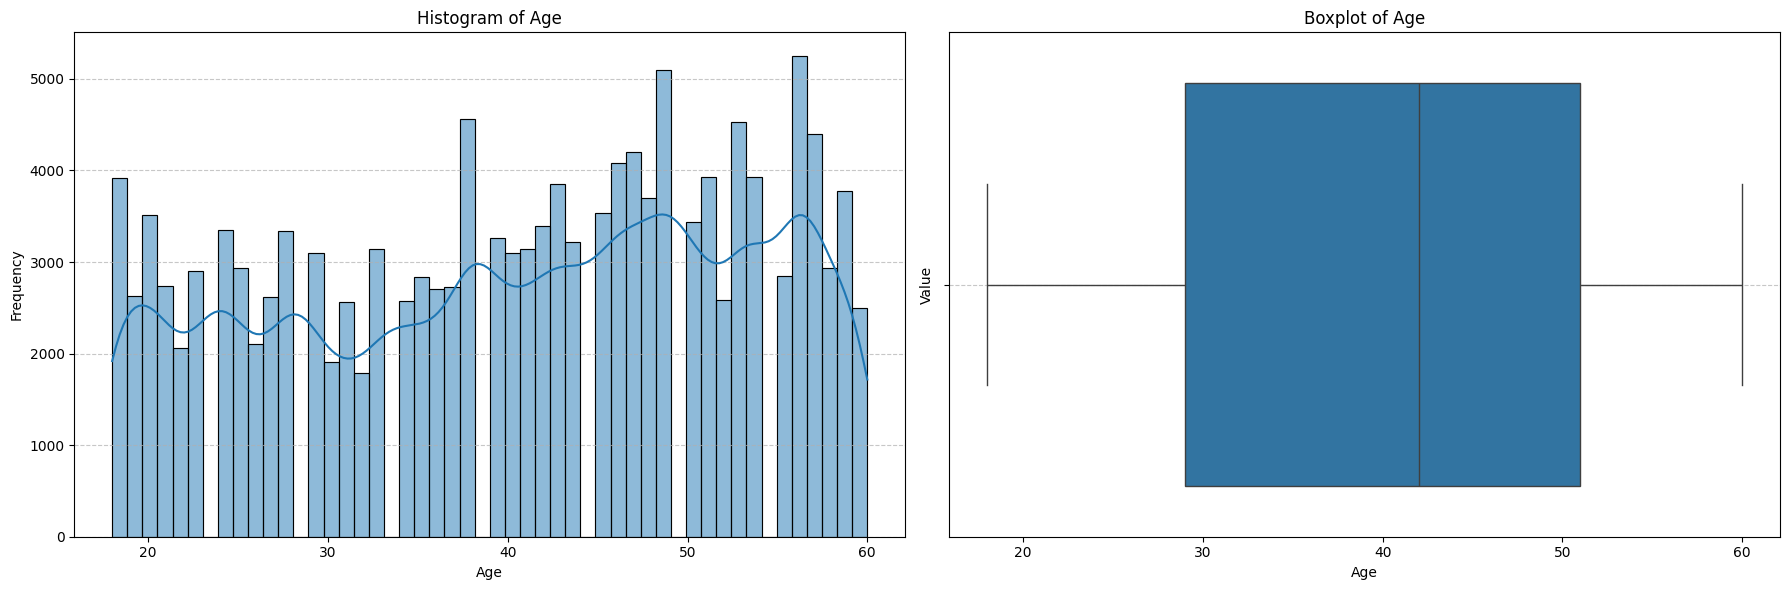

In [13]:
visualizer.plot('Age')

#### Insights
- The dataset represents a balanced age range, from younger adults (18 years) to older adults (60 years)
- The uniform histogram suggests that no particular age group dominates, though middle-aged individuals are slightly more represented

## City
### Checking missing values

In [14]:
check_and_print_missing_value_counts(data, 'City')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [15]:
data['City'].describe()

count     140700
unique        98
top       Kalyan
freq        6591
Name: City, dtype: object

### Visualization

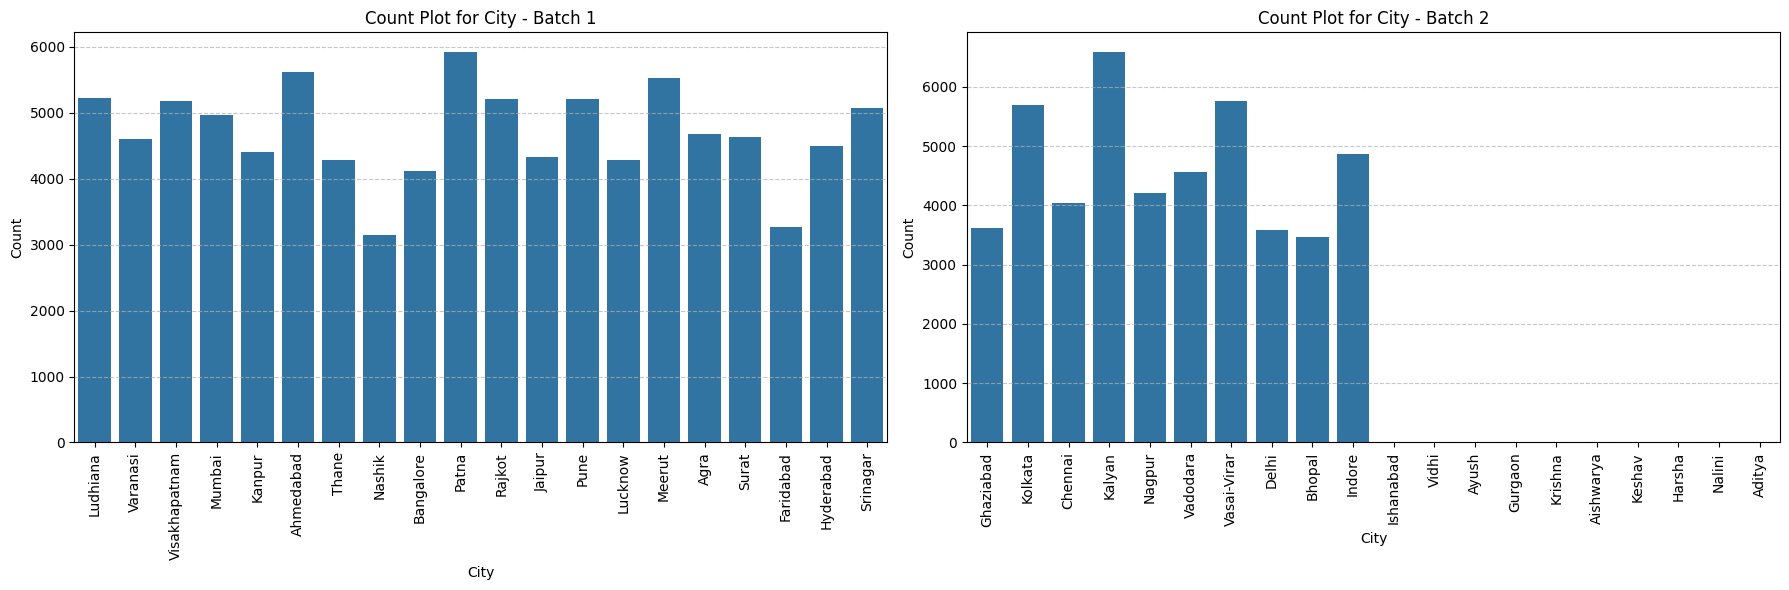

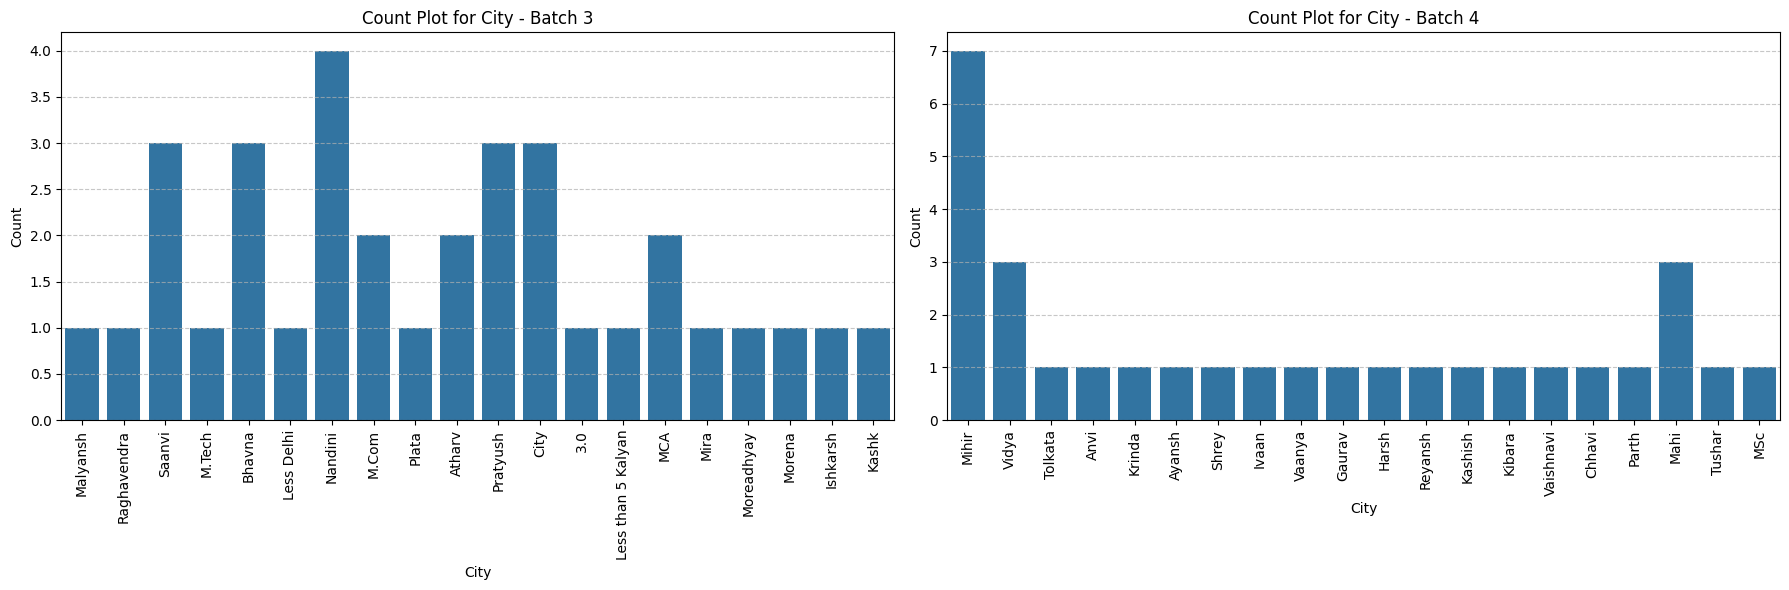

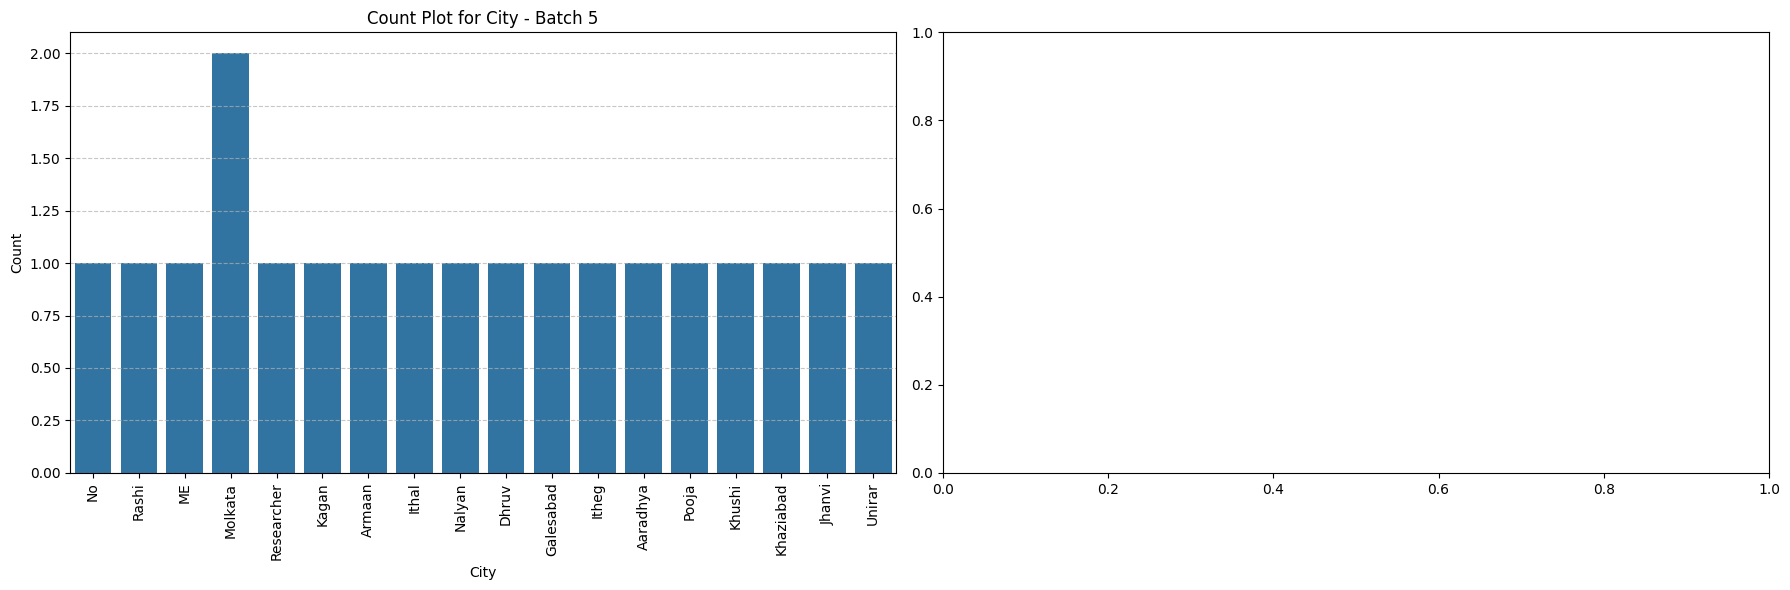

In [16]:
visualizer.plot('City')

#### Insights:
- Certain cities dominate the dataset, such as Kalyan and Patna, while others have only a few observations. This imbalance could affect analyses involving city-specific comparisons

## Working Professional or Student
### Checking missing values

In [17]:
check_and_print_missing_value_counts(data, 'Working Professional or Student')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [18]:
data['Working Professional or Student'].describe()

count                   140700
unique                       2
top       Working Professional
freq                    112799
Name: Working Professional or Student, dtype: object

### Visualization

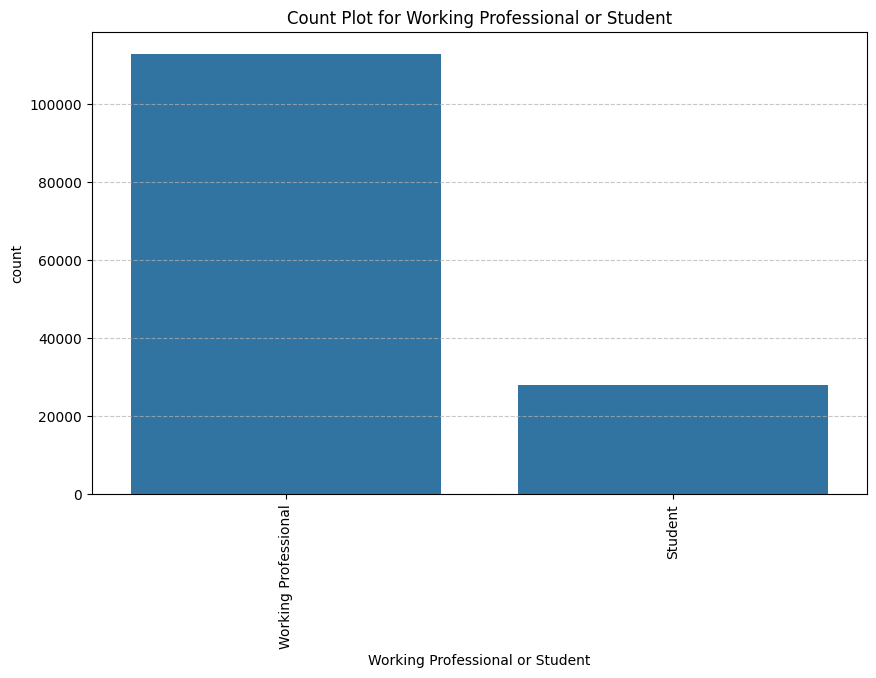

In [19]:
visualizer.plot('Working Professional or Student')

#### Insights:
- No missing values
- Imbalanced distribution: approximately 80% working professionals and 20% students

## Profession
### Checking missing values

In [20]:
check_and_print_missing_value_counts(data, 'Profession')

Missing values count: 36630
Missing values percentage: 26.03%


### Descriptive statistics

In [21]:
data['Profession'].describe()

count      104070
unique         64
top       Teacher
freq        24906
Name: Profession, dtype: object

### Visualization

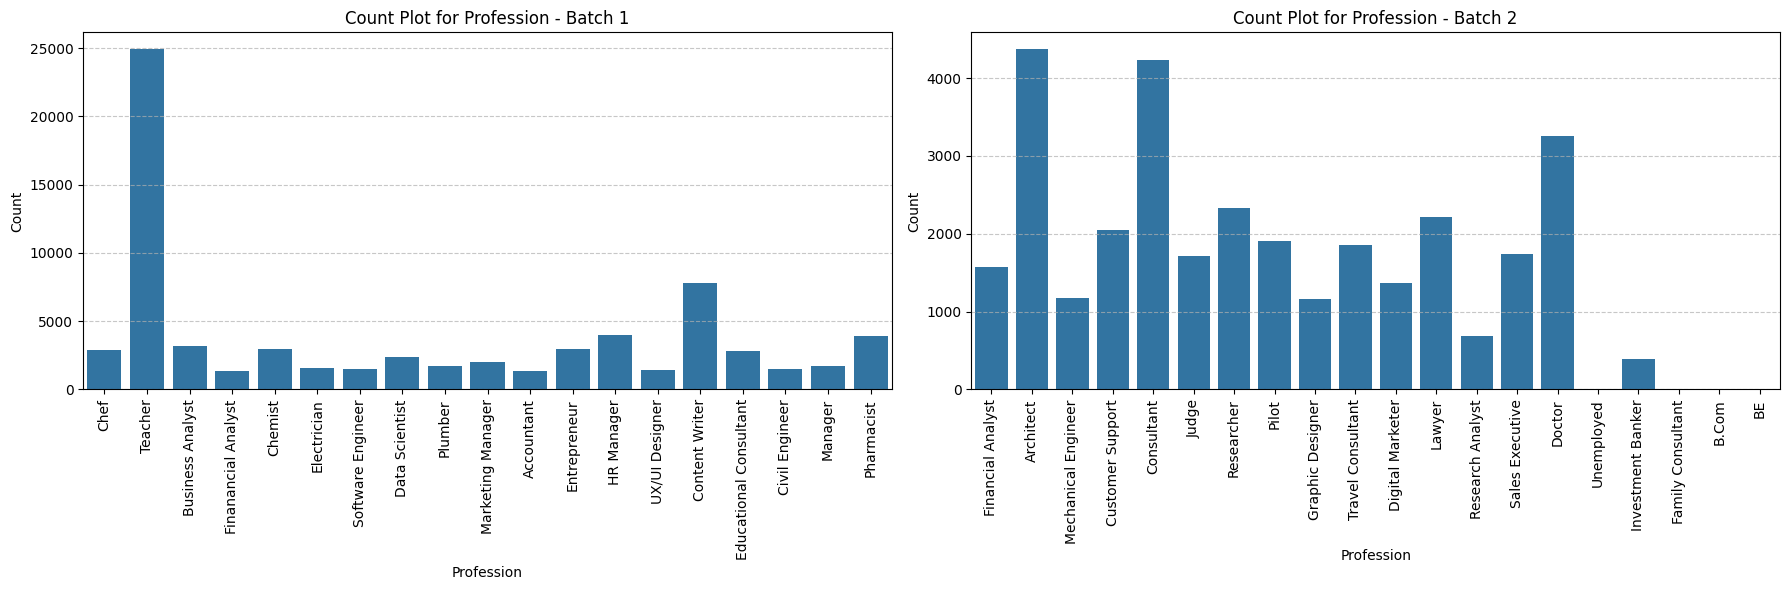

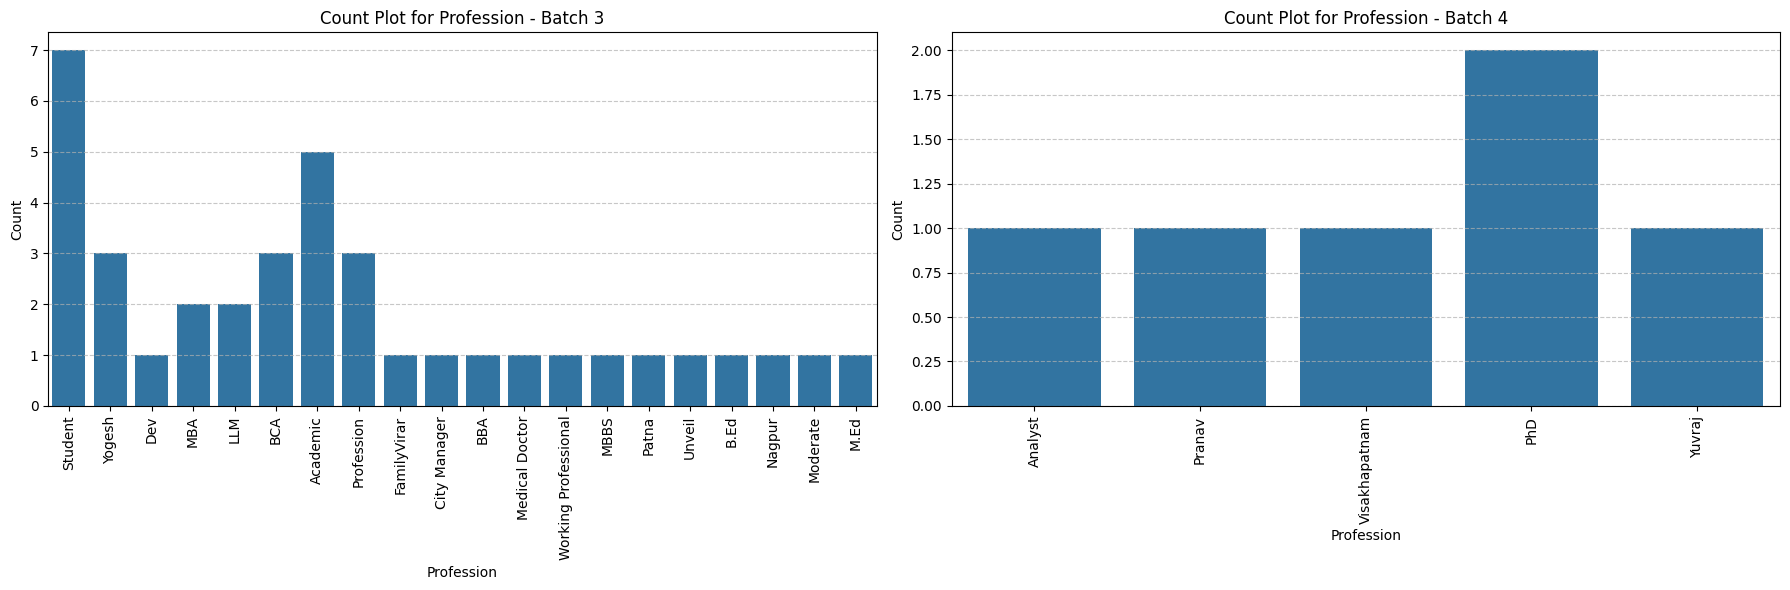

In [22]:
visualizer.plot('Profession')

**Insights:**
- A few professions, such as Teacher and Content Writer, make up a large proportion of the data
- Many other professions are underrepresented, which may affect the reliability of analyses involving these roles
- The 26.03% missing data might correspond to individuals whose professions were not recorded or applicable.

## Academic Pressure
### Checking missing values

In [23]:
check_and_print_missing_value_counts(data, 'Academic Pressure')

Missing values count: 112803
Missing values percentage: 80.17%


### Descriptive statistics

In [24]:
data['Academic Pressure'].describe()

count     27897.0
unique        5.0
top           3.0
freq       7463.0
Name: Academic Pressure, dtype: float64

### Visualization

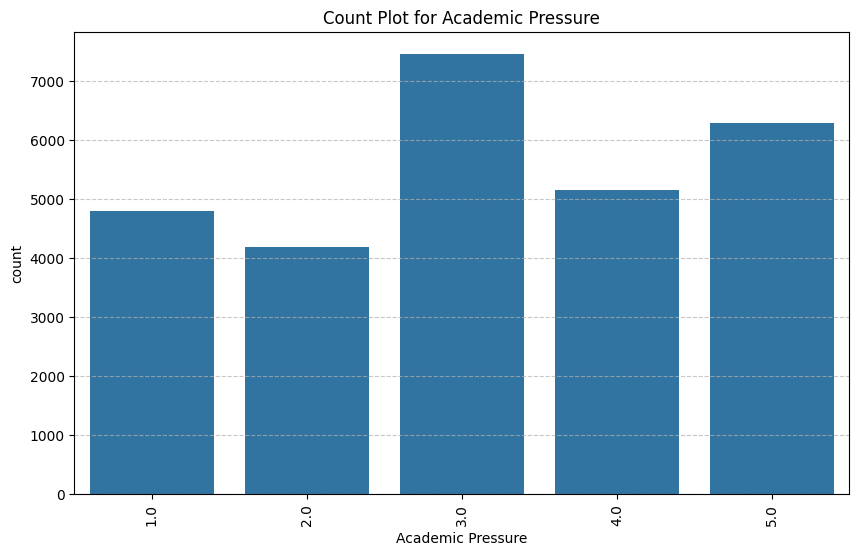

In [25]:
visualizer.plot('Academic Pressure')

#### Insights:
- The large proportion of missing values is likely due to the feature being irrelevant for working professionals
- The distribution shows a peak at 3.0, with moderate counts at 4.0 and 5.0
- This suggests that many students reported a medium level of academic pressure

## Work Pressure
### Checking missing values

In [26]:
check_and_print_missing_value_counts(data, 'Work Pressure')

Missing values count: 27918
Missing values percentage: 19.84%


### Descriptive statistics

In [27]:
data['Work Pressure'].describe()

count     112782.0
unique         5.0
top            2.0
freq       24373.0
Name: Work Pressure, dtype: float64

### Visualization

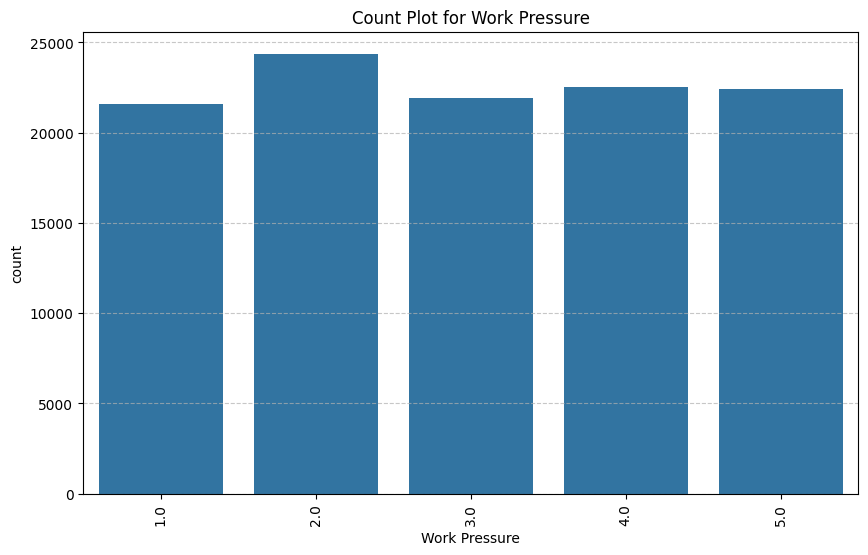

In [28]:
visualizer.plot('Work Pressure')

#### Insights:
- Missing values of approximately 20% could be because this feature is irrelevant for students
- The bar chart shows a relatively uniform distribution across the categories, with slightly more responses for category 2.0
- This suggests most respondents reported a relatively low-to-moderate level of work pressure


## CGPA
### Checking missing values

In [29]:
check_and_print_missing_value_counts(data, 'CGPA')

Missing values count: 112802
Missing values percentage: 80.17%


### Descriptive statistics

In [30]:
data['CGPA'].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

### Visualization

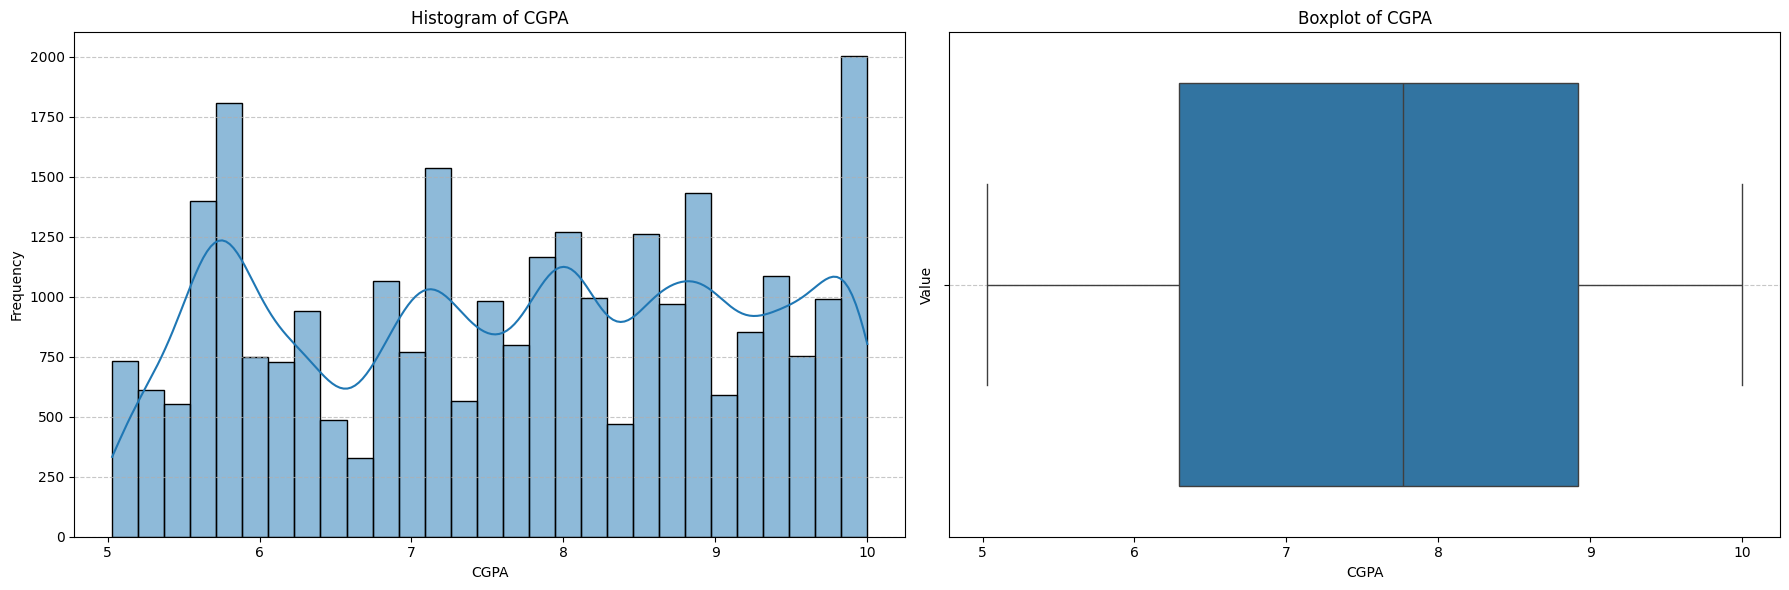

In [31]:
visualizer.plot('CGPA')

#### Insights:
- Again, this is likely missing for working professionals
- **Histogram:** The distribution is slightly skewed to the right (many students have CGPA values above 7.5)
- **Boxplot:** Indicates no major outliers, with most CGPA values concentrated around the middle quartiles

## Study Satisfaction
### Checking missing values

In [32]:
check_and_print_missing_value_counts(data, 'Study Satisfaction')

Missing values count: 112803
Missing values percentage: 80.17%


### Descriptive statistics

In [33]:
data['Study Satisfaction'].describe()

count     27897.0
unique        5.0
top           4.0
freq       6360.0
Name: Study Satisfaction, dtype: float64

### Visualization

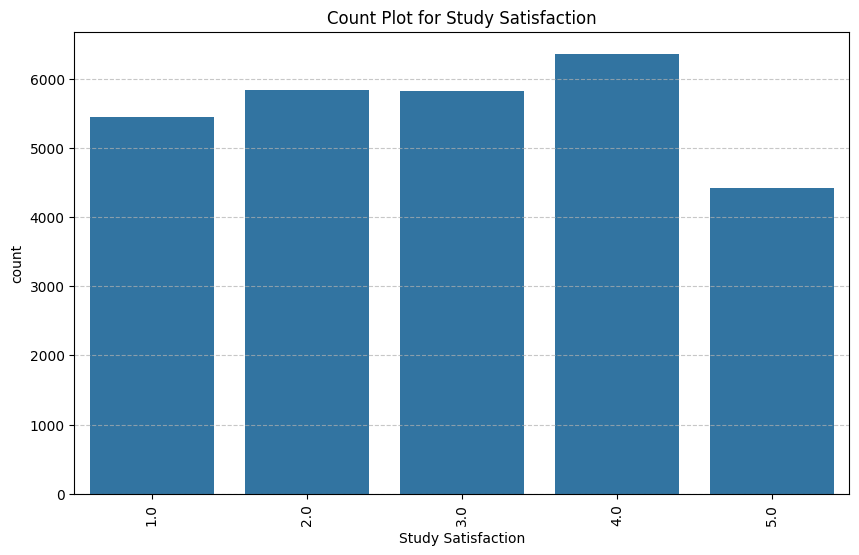

In [34]:
visualizer.plot('Study Satisfaction')

#### Insights:
- 80.17% missing values, likely because this applies only to students
- Distribution shows a peak at 4.0, with relatively fewer students at 5.0

## Job Satisfaction
### Checking missing values

In [35]:
check_and_print_missing_value_counts(data, 'Job Satisfaction')

Missing values count: 27910
Missing values percentage: 19.84%


### Descriptive statistics

In [36]:
data['Job Satisfaction'].describe()

count     112790.0
unique         5.0
top            2.0
freq       24783.0
Name: Job Satisfaction, dtype: float64

### Visualization

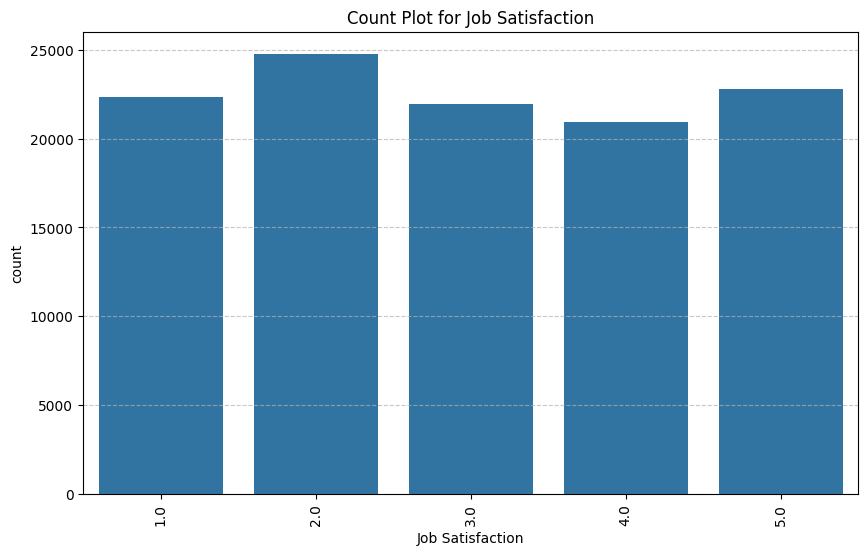

In [37]:
visualizer.plot('Job Satisfaction')

#### Insights:
- 19.84% missing values, likely because it is irrelevant for students
- Distribution peaks at 2.0, indicating dissatisfaction among working professionals

## Sleep Duration
### Checking missing values

In [38]:
check_and_print_missing_value_counts(data, 'Sleep Duration')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [39]:
data['Sleep Duration'].describe()

count                140700
unique                   36
top       Less than 5 hours
freq                  38784
Name: Sleep Duration, dtype: object

### Visualization

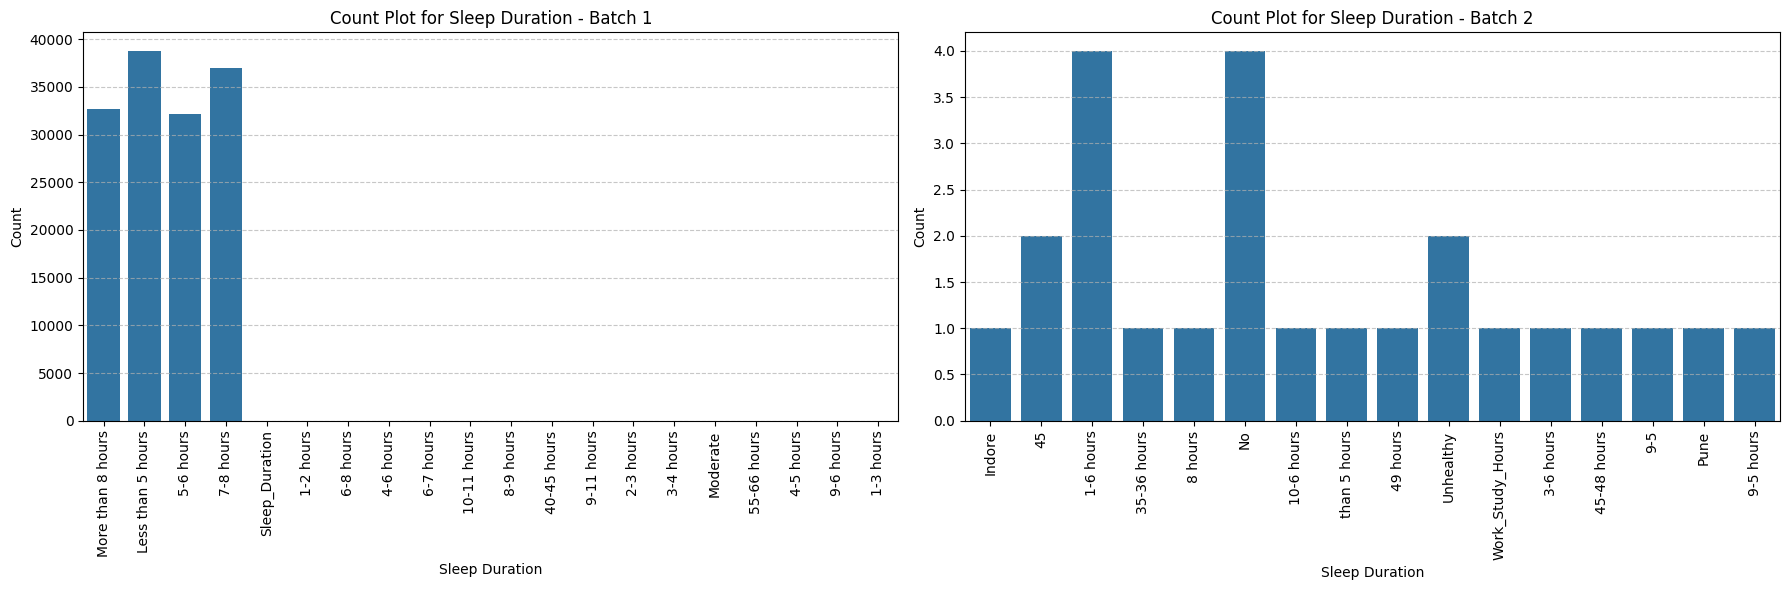

In [40]:
visualizer.plot('Sleep Duration')

#### Insights:
- No missing values
- Wide range of sleep durations, with "Less than 5 hours" being the most frequent
- Patterns show clusters around insufficient sleep (<5 hours) and healthy sleep (7-8 hours)

## Dietary Habits
### Checking missing values

In [41]:
check_and_print_missing_value_counts(data, 'Dietary Habits')

Missing values count: 4
Missing values percentage: 0.0%


### Descriptive statistics

In [42]:
data['Dietary Habits'].describe()

count       140696
unique          23
top       Moderate
freq         49705
Name: Dietary Habits, dtype: object

### Visualization

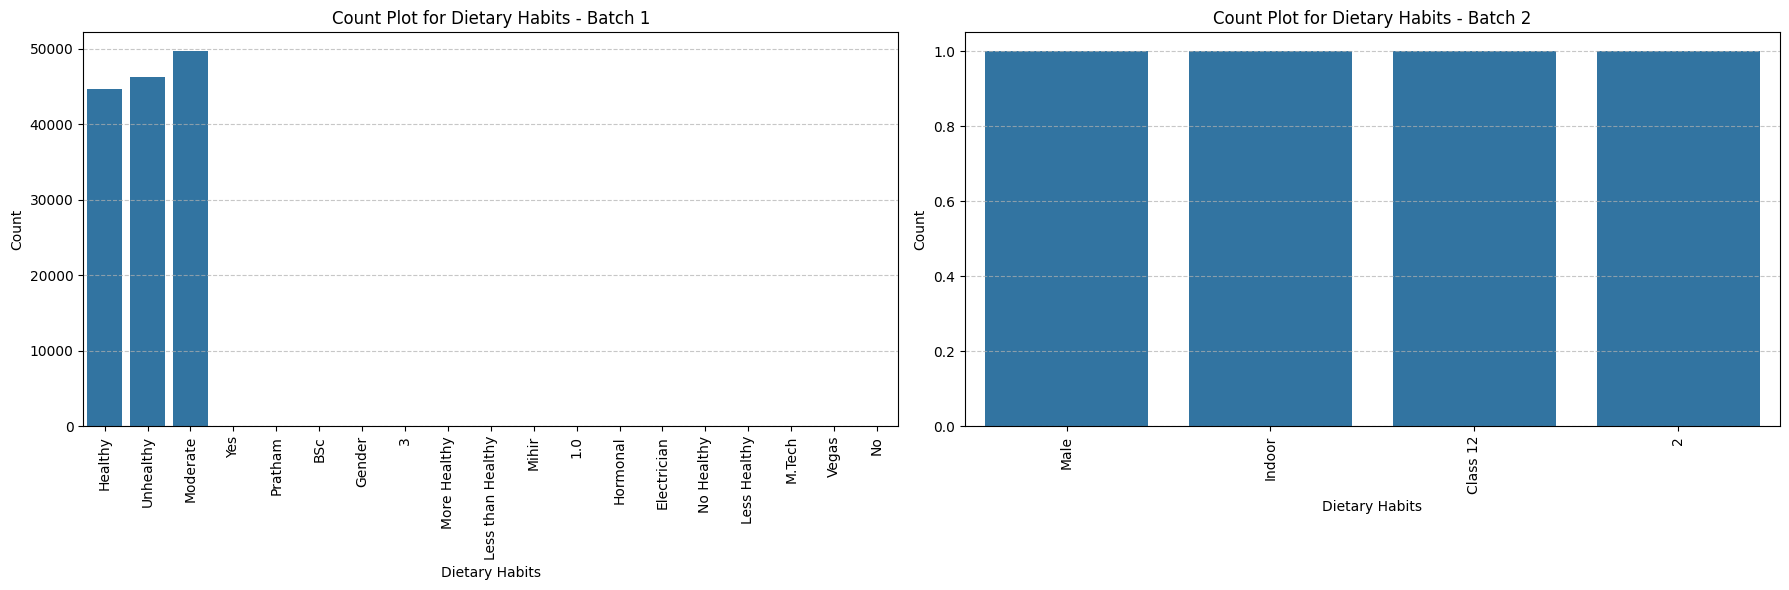

In [43]:
visualizer.plot('Dietary Habits')

#### Insights:
- A significant portion of the population reports having a moderate diet, while smaller groups fall under healthy or unhealthy categories
- Many low-frequency categories could be grouped into another category (e.g., "Unknown") to simplify analysis and focus on meaningful patterns

## Degree
### Checking missing values

In [44]:
check_and_print_missing_value_counts(data, 'Degree')

Missing values count: 2
Missing values percentage: 0.0%


### Descriptive statistics

In [45]:
data['Degree'].describe()

count       140698
unique         115
top       Class 12
freq         14729
Name: Degree, dtype: object

### Visualization

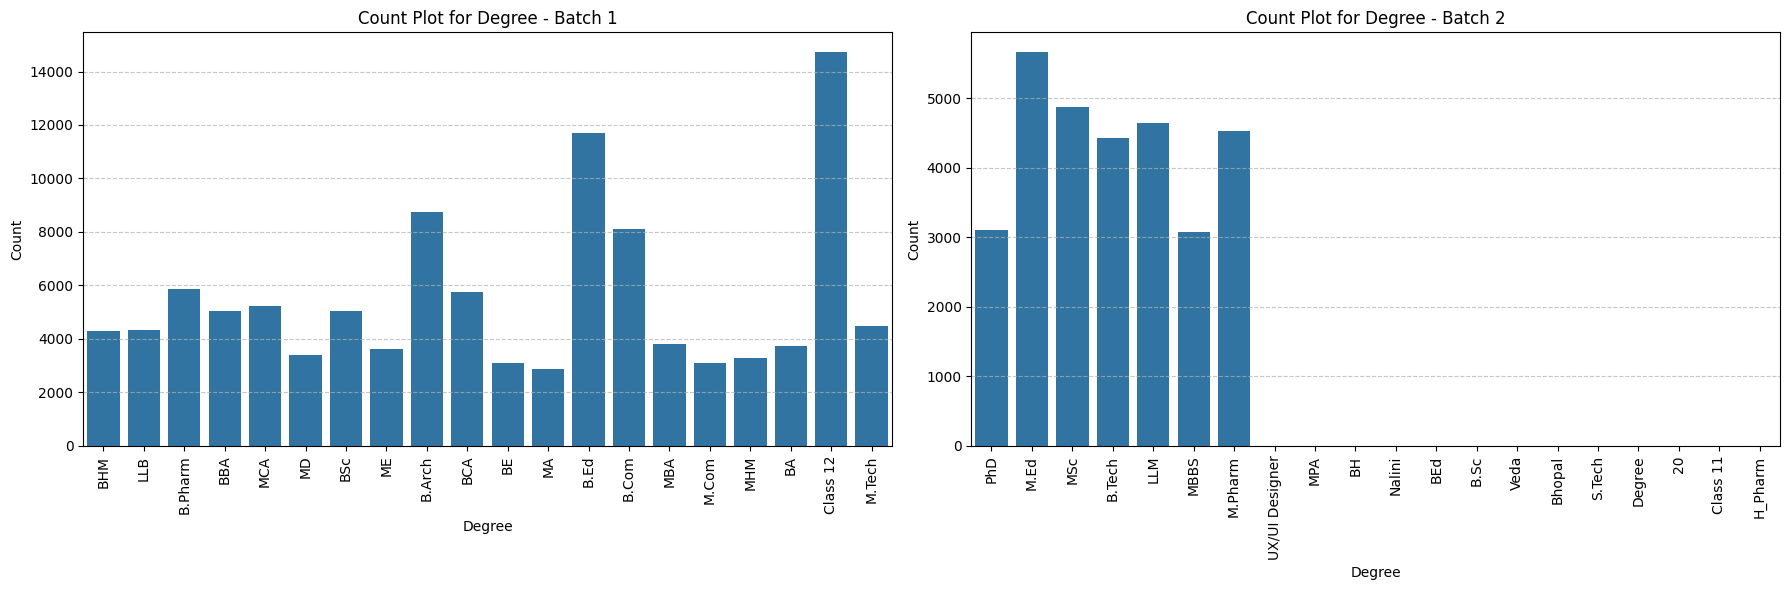

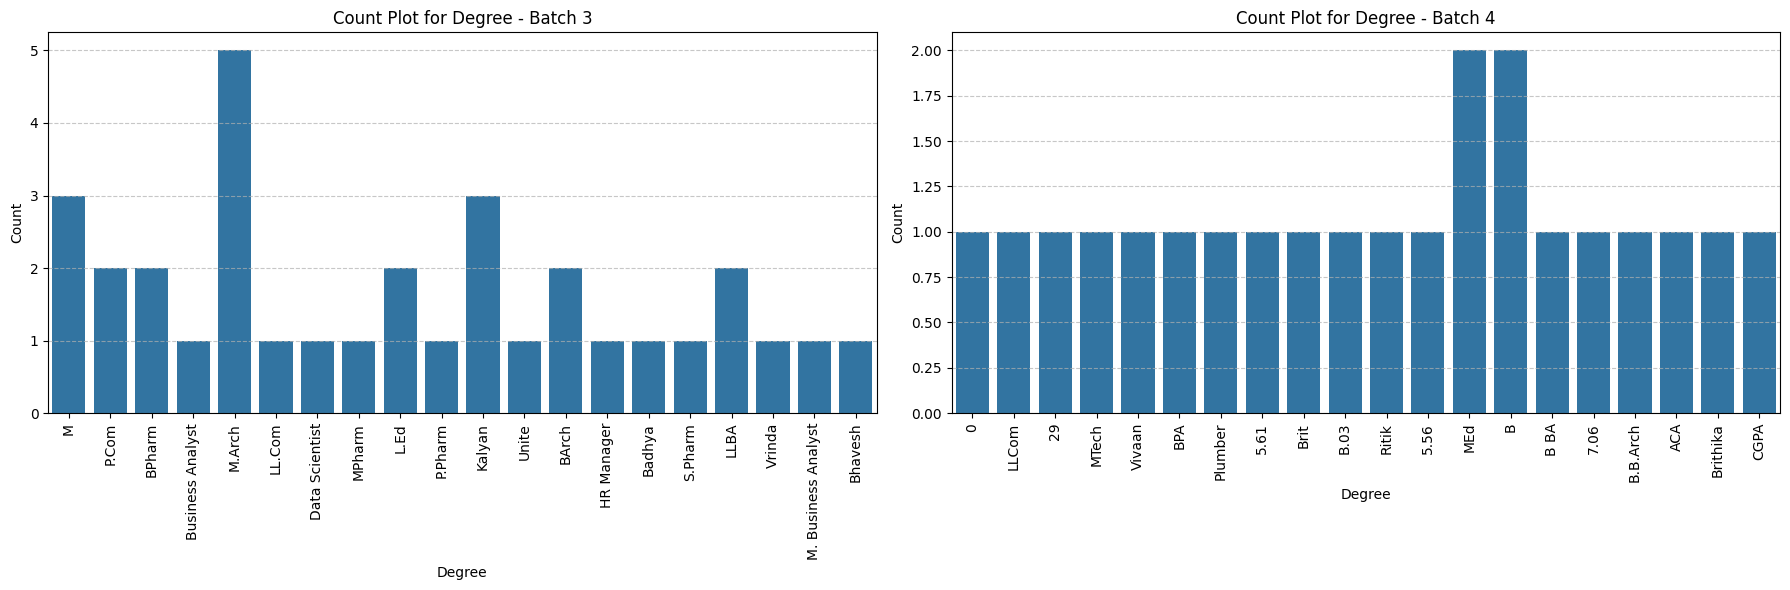

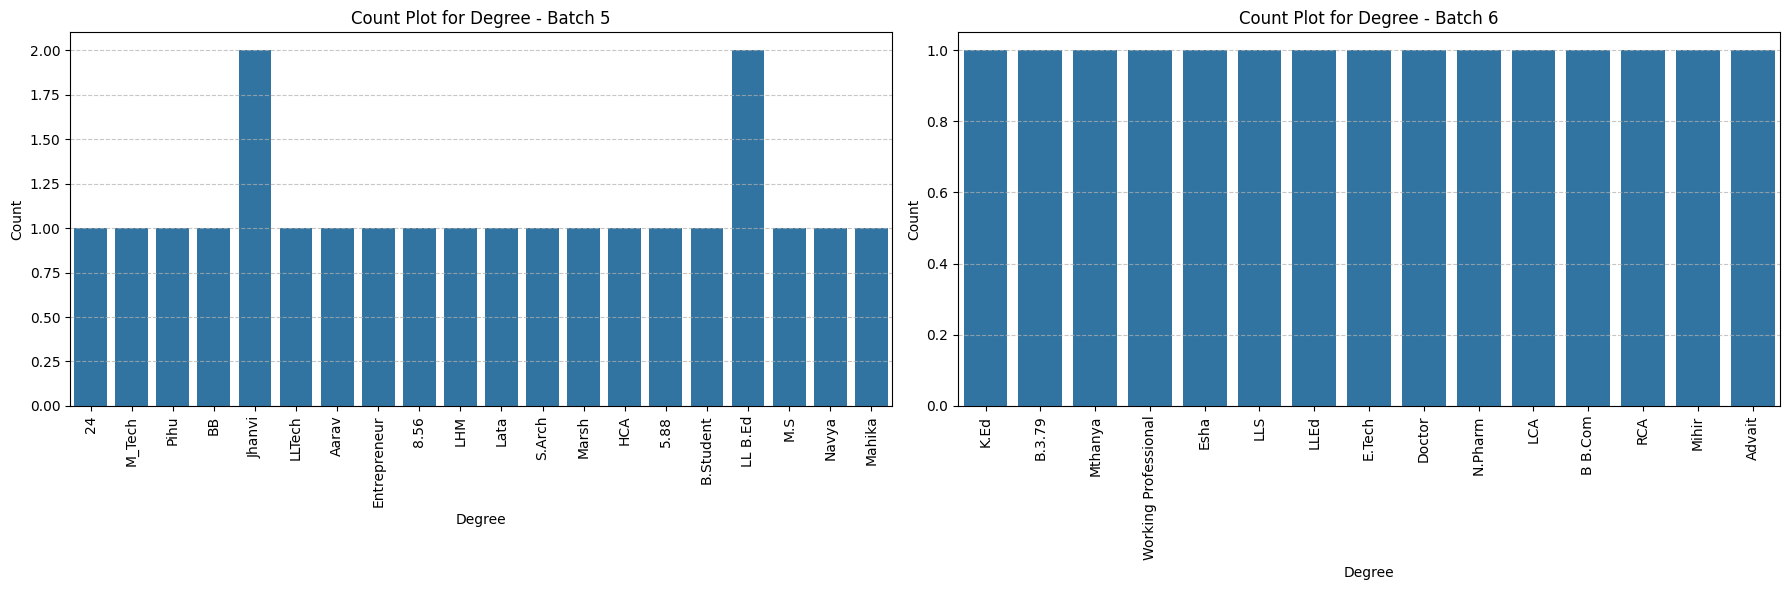

In [46]:
visualizer.plot('Degree')

#### Insights:
- The dataset is dominated by a few common degrees, such as Class 12, B.Ed, and B.Arch, while other degrees have very low representation
- This imbalance might skew analyses unless grouped or filtered
- The dataset includes a wide range of degrees, reflecting a highly diverse population
- The presence of low-frequency degrees (e.g., niche certifications or advanced qualifications) indicates variability in the dataset

## Have you ever had suicidal thoughts ?
### Checking missing values

In [47]:
check_and_print_missing_value_counts(data, 'Have you ever had suicidal thoughts ?')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [48]:
data['Have you ever had suicidal thoughts ?'].describe()

count     140700
unique         2
top           No
freq       71138
Name: Have you ever had suicidal thoughts ?, dtype: object

### Visualization

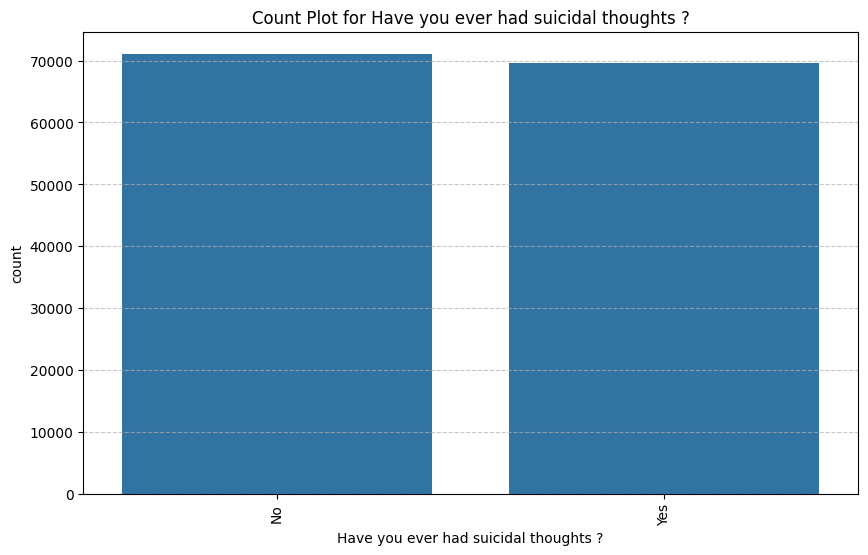

In [49]:
visualizer.plot('Have you ever had suicidal thoughts ?')

#### Insights:
- Nearly 49.5% of respondents report having had suicidal thoughts, indicating a significant mental health concern in the dataset population
- The almost equal distribution between "Yes" and "No" responses makes this variable valuable for correlation and modeling, as it provides sufficient representation for both groups

## Work/Study Hours
### Checking missing values

In [50]:
check_and_print_missing_value_counts(data, 'Work/Study Hours')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [51]:
data['Work/Study Hours'].describe()

count     140700.0
unique        13.0
top           10.0
freq       14199.0
Name: Work/Study Hours, dtype: float64

### Visualization

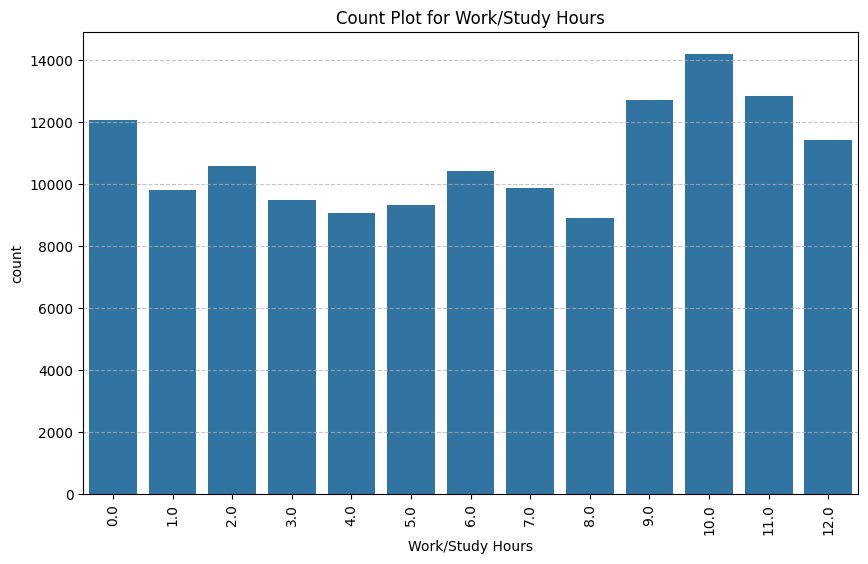

In [52]:
visualizer.plot('Work/Study Hours')

#### Insights:
- No missing values
- Peaks around 10 hours per day
- Skewed towards higher work/study hours

## Financial Stress
### Checking missing values

In [53]:
check_and_print_missing_value_counts(data, 'Financial Stress')

Missing values count: 4
Missing values percentage: 0.0%


### Descriptive statistics

In [54]:
data['Financial Stress'].describe()

count     140696.0
unique         5.0
top            2.0
freq       31451.0
Name: Financial Stress, dtype: float64

### Visualization

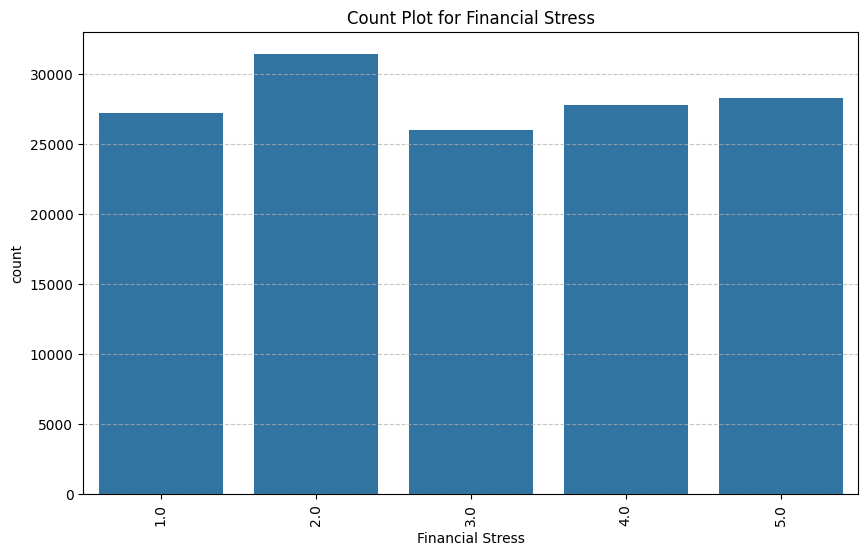

In [55]:
visualizer.plot('Financial Stress')

#### Insights:
- Minimal missing values (4 cases)
- Scale from 1 to 5, with a slight peak at 2.0 (low financial stress)

## Family History of Mental Illness
### Checking missing values

In [56]:
check_and_print_missing_value_counts(data, 'Family History of Mental Illness')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [57]:
data['Family History of Mental Illness'].describe()

count     140700
unique         2
top           No
freq       70758
Name: Family History of Mental Illness, dtype: object

### Visualization

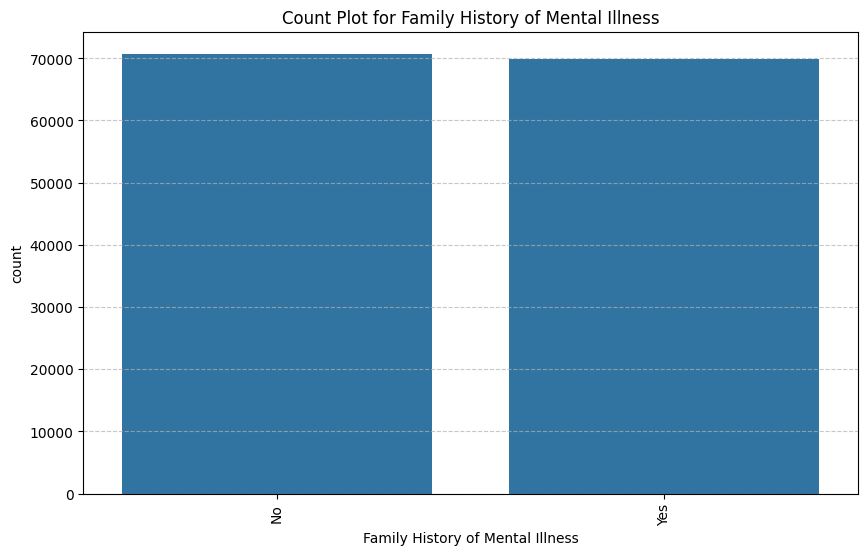

In [58]:
visualizer.plot('Family History of Mental Illness')

#### Insights:
- No missing values
- Balanced distribution between "Yes" and "No"

## Depression
### Checking missing values

In [59]:
check_and_print_missing_value_counts(data, 'Depression')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [60]:
data['Depression'].describe()

count     140700
unique         2
top            0
freq      115133
Name: Depression, dtype: int64

### Visualization

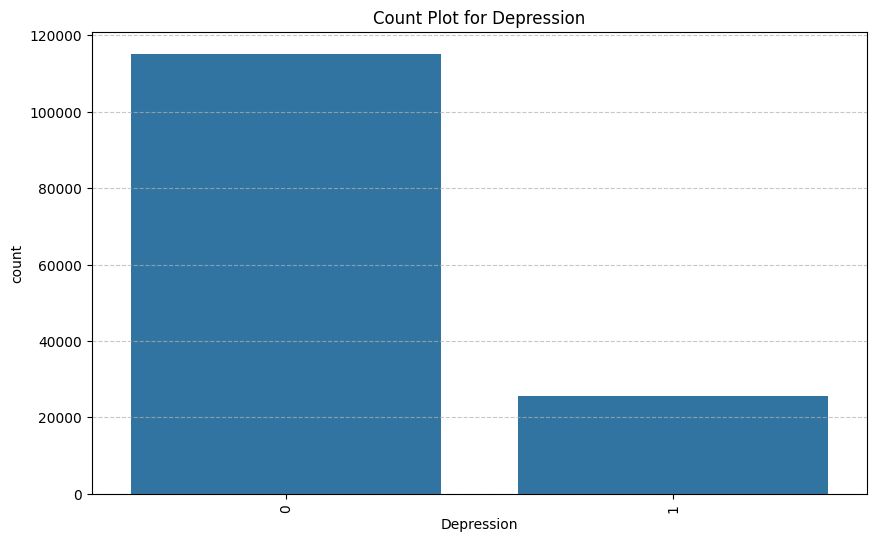

In [61]:
visualizer.plot('Depression')

#### Insights:
- Class Imbalance: Most responses are "No" for depression

# Data Preperation
## Handling Missing Values
### CGPA
For this feature that is relevant only to students, we will assign a value of -1 (a value outside the observed range for these attributes) to signify that this is not applicable to working professionals. For missing values in student records, we will impute the data using the median
### Academic Pressure, Study Satisfaction, Work Pressure and Job Satisfaction
For features such as **Academic Pressure, and Study Satisfaction**, which are only relevant to students, we will assign a new category, **"Not Applicable"**, to all rows corresponding to working professionals. For any missing values within student records, we will impute them using the **mode** of the respective feature. Similarly, for features like **Work Pressure** and **Job Satisfaction**, which are applicable only to working professionals, we will assign the category **"Not Applicable"** to all student rows. For missing values within working professional records, the **mode** of the respective feature will be used for imputation. This approach ensures that the data remains consistent while preserving the contextual relevance of each feature. 
### Profession
To address missing values in **Profession**, we will create two distinct categories: **'Unknown'** for missing data among professionals and **'Student'** for missing data among students. This method provides a clear distinction between the two groups and ensures more accurate and meaningful handling of missing values, enhancing the quality and interpretability of the data.
### Financial Stress, Dietary Habits and Degree
The attributes Financial Stress (4 missing values), Dietary Habits (4 missing values) and Degree (2 missing values) have a minimal number of missing entries. As both are categorical variables, we will impute the missing values using their respective **mode**, ensuring the most frequently occurring category is preserved. This approach maintains data consistency while minimizing the impact of missing values on the analysis

In [62]:
data = handle_missing_values(data)

## Handling outliers
The categorical variables 'Profession,' 'City,' 'Sleep Duration,' 'Dietary Habits,' and 'Degree' exhibit potential outliers, with some categories having a frequency of approximately 20 or fewer, suggesting they may represent noise. To address this, we will create a new category, 'Other,' for each of these variables. This category will consolidate all infrequent categories with fewer than 20 records, improving data representation and reducing the impact of sparsely populated categories on the analysis

In [63]:
data = handle_outliers(data)

# Post Data Preperation Univariate Analysis

In [64]:
visualizer = DataVisualizer(data)

## CGPA

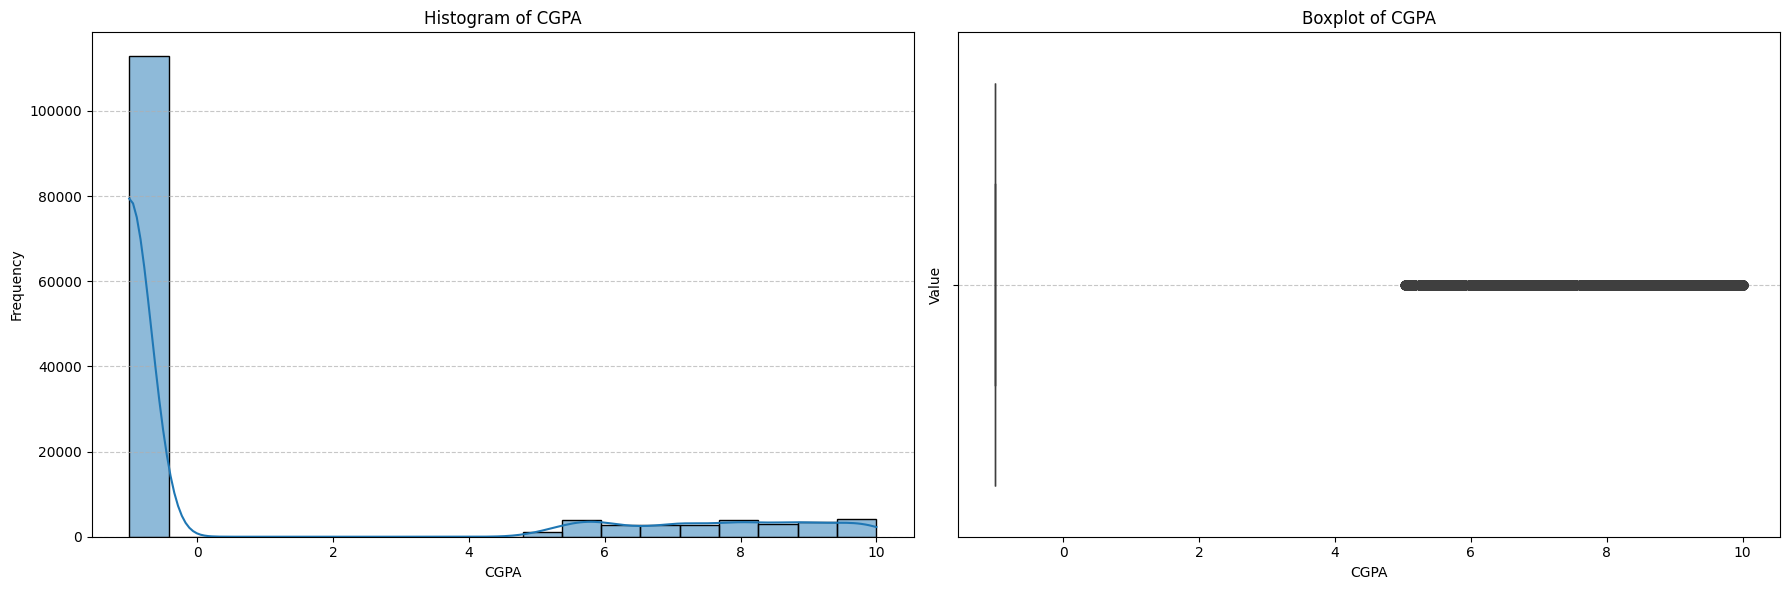

In [65]:
visualizer.plot('CGPA')

#### Insights:
- The histogram shows a significant spike at -1, corresponding to the working professionals who are not applicable for CGPA
- This indicates that the majority of the data represents working professionals (as expected from the dataset distribution)
- The imputation of missing values using the median has maintained the integrity of the distribution for students, ensuring no distortion
- The student CGPA values are slightly right-skewed, indicating that more students have higher CGPA scores compared to lower ones
- The boxplot clearly shows a distinct separation for working professionals with a CGPA value of -1
- This is a good approach as it ensures the two groups (students and professionals) are clearly differentiated
- There are no significant outliers visible among the student CGPA values (5–10 range)
- This indicates the imputation process did not introduce any anomalies
- The student CGPA data remains centered around the median (7.5), which aligns with the expected academic performance range

## Academic Pressure

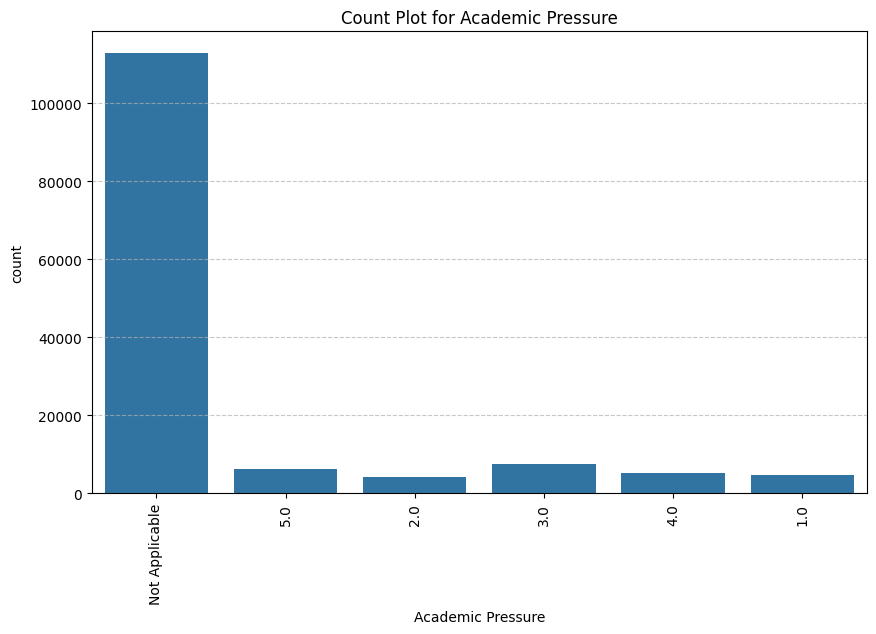

In [66]:
visualizer.plot('Academic Pressure')

#### Insights:
- The "Not Applicable" category overwhelmingly dominates the distribution, reflecting the majority of the dataset being working professionals (as expected from the dataset composition)
- This category effectively separates working professionals from students, maintaining clarity and interpretability
- Imputing missing values with the mode has preserved the integrity of the distribution for students while maintaining the dataset’s consistency
- There is no visible distortion or anomalies introduced by the imputation

## Study Satisfaction

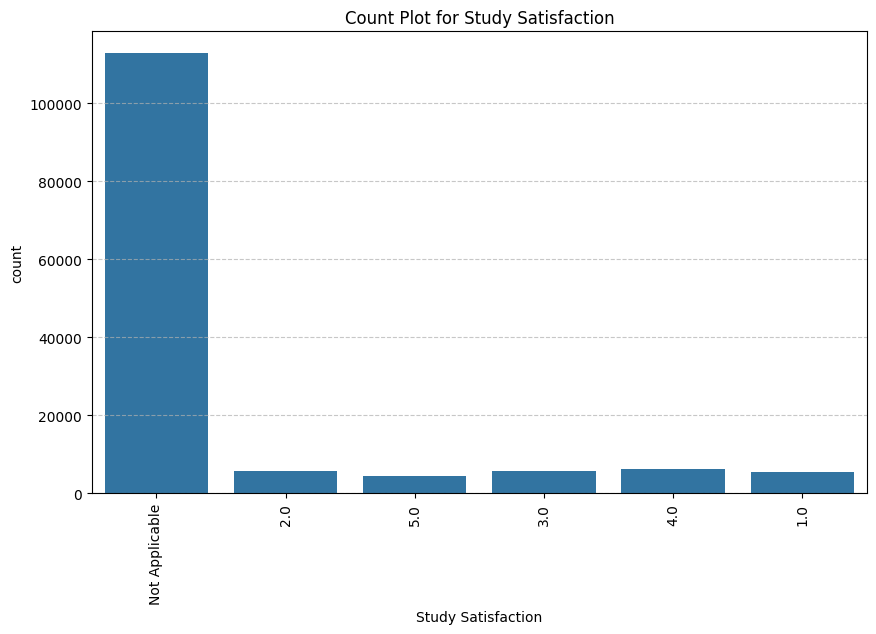

In [67]:
visualizer.plot('Study Satisfaction')

#### Insights:
- As with Academic Pressure, the "Not Applicable" category dominates the distribution.
- Imputing missing values with the mode has preserved the integrity of the distribution for students while maintaining the dataset’s consistency
- There is no visible distortion or anomalies introduced by the imputation

## Work Pressure

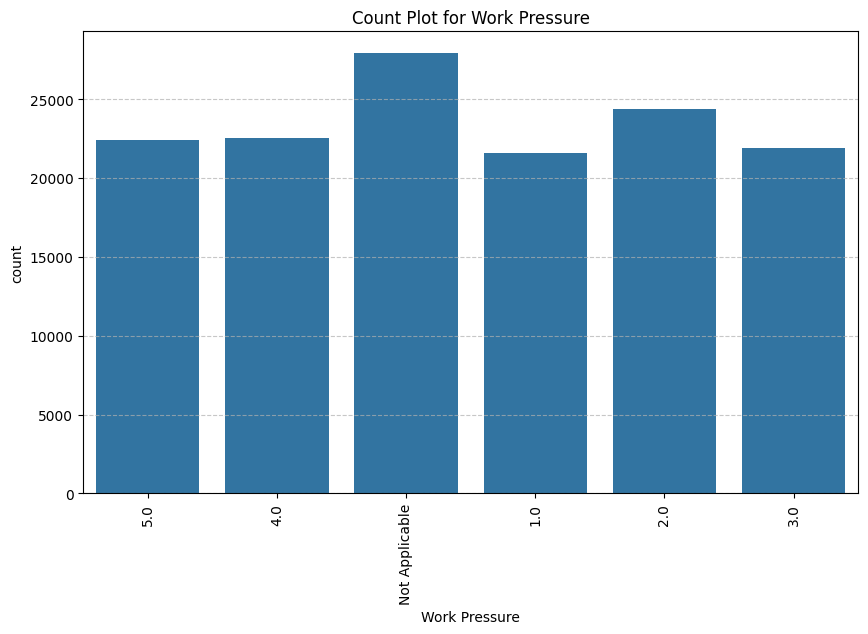

In [68]:
visualizer.plot('Work Pressure')

#### Insights:
- A significant proportion of the data falls under the "Not Applicable" category, corresponding to students who are not subject to work pressure
- This category serves as a clear separator between students and working professionals, ensuring that irrelevant data does not interfere with the analysis

## Job Satisfaction

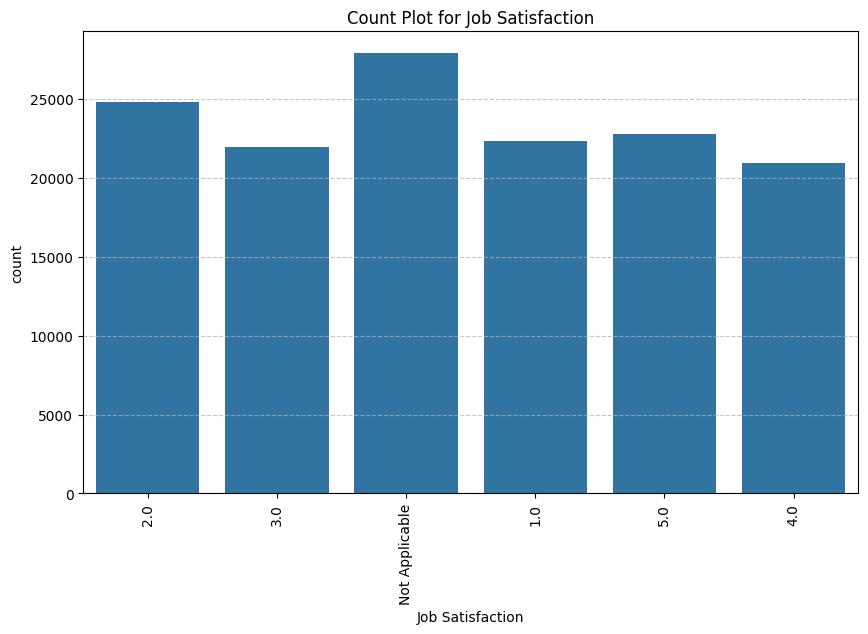

In [69]:
visualizer.plot('Job Satisfaction')

#### Insights:
- A significant portion of the data is categorized as "Not Applicable", reflecting the presence of students for whom job satisfaction is irrelevant
- This separation ensures that students are not misrepresented in the analysis of job satisfaction

## Profession

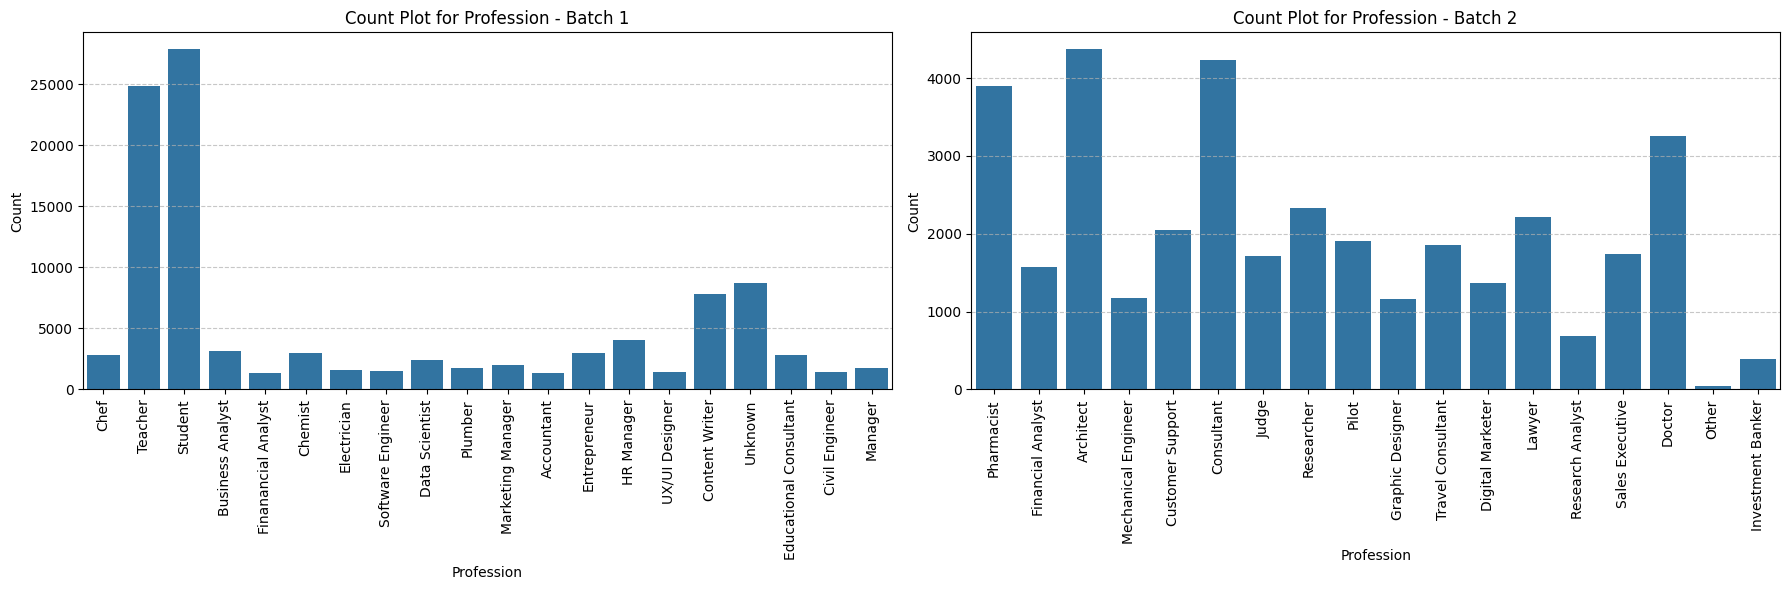

In [71]:
visualizer.plot('Profession')

#### Insights:
- A significant proportion of the entries fall into the Student and Teacher categories. This aligns with the dataset's mixed focus on students and working professionals, with students making up a considerable chunk
- The "Unknown" category for missing or unidentifiable profession data is appropriately visible. This ensures that missing values are well-accounted for without biasing other professional categories
- There is a noticeable imbalance between the profession categories. For instance, some professions like Doctors and Content Writers have a significant number of entries, while others like Investment Bankers or Managers are underrepresented. This may impact any analysis or modeling that uses profession as a feature

## Financial Stress

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


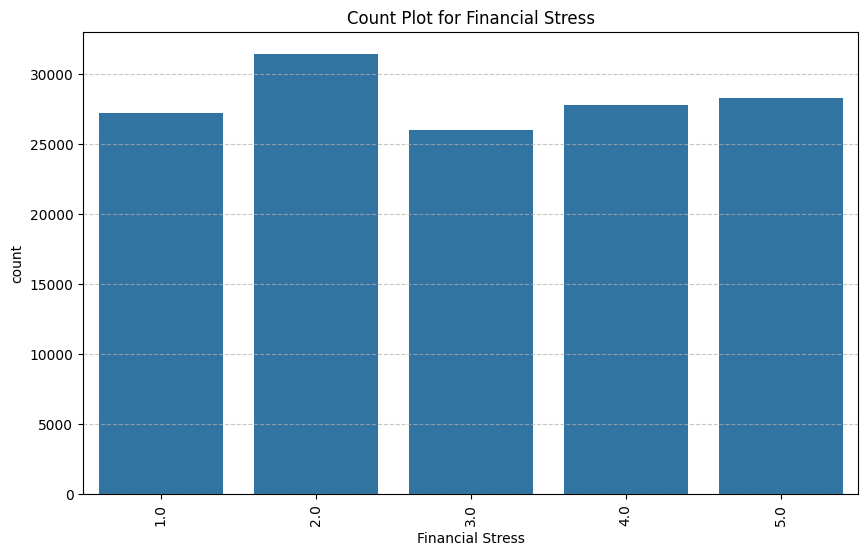

In [72]:
visualizer.plot('Financial Stress')

#### Insights:
- Financial stress appears to be fairly evenly distributed (as in the initial univariate analysis) across the scale of 1 to 5, with no single category overwhelmingly dominant.

## Dietary Habits

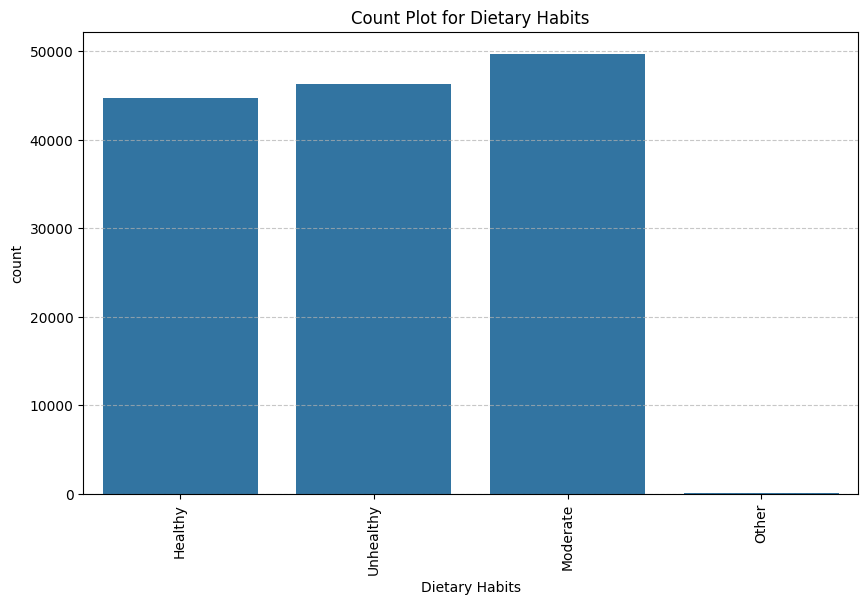

In [73]:
visualizer.plot('Dietary Habits')

#### Insights:
- The post-data preparation process significantly improved the Dietary Habits feature by:
    - Reducing noise and sparsity
    - Enhancing interpretability and usability in both descriptive and predictive analyses

## Degree

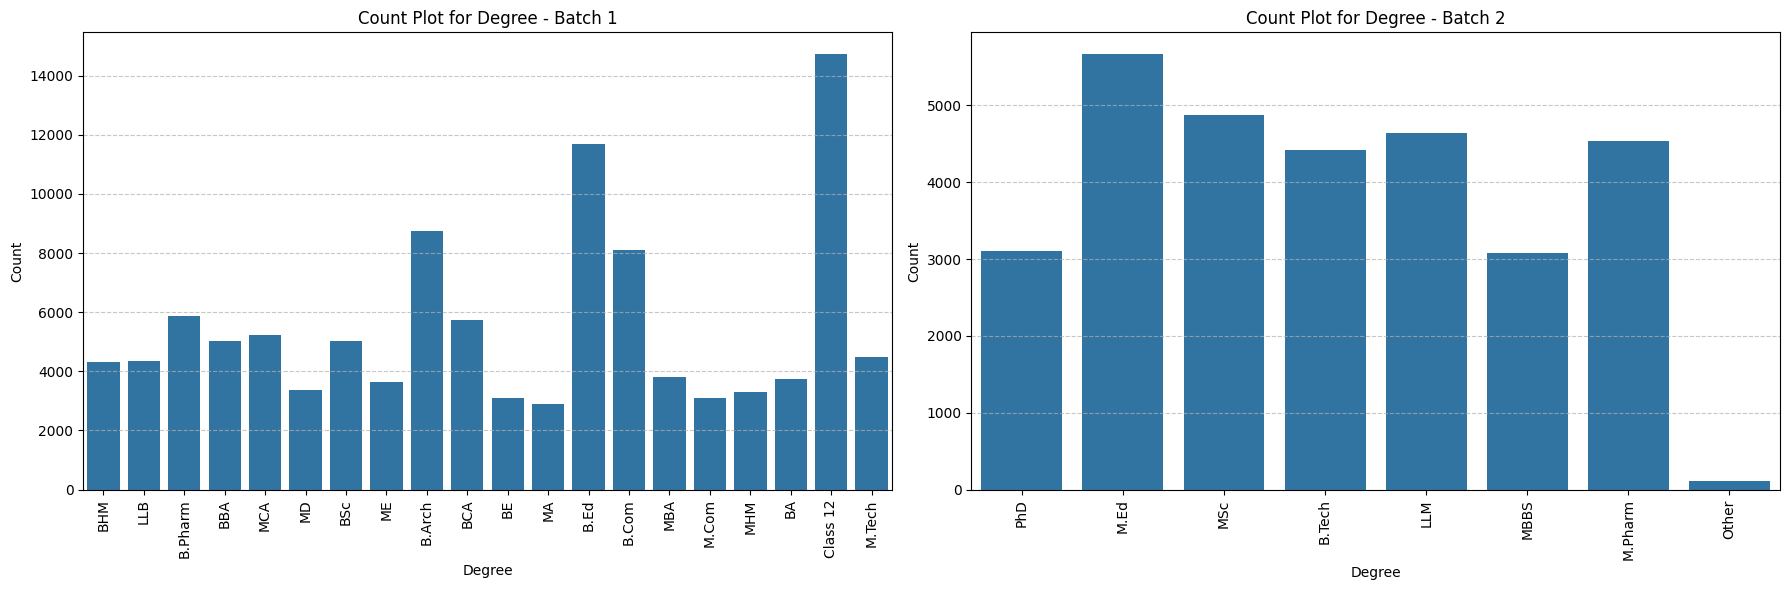

In [74]:
visualizer.plot('Degree')

#### Insights:
- The rare and ambiguous degree categories were consolidated
- Meaningful categories like Class 12, B.Tech, PhD, and other common degrees remained as dominant groups
- Rare entries were likely merged into an "Other" category, ensuring these cases are preserved without skewing the analysis